In [1]:
import itertools
import os

import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from softcvi_validation.utils import get_palette
from softcvi_validation.tasks.available_tasks import get_available_tasks
from spyrox.utils import get_abspath_project_root

os.chdir(get_abspath_project_root())
plt.style.use('./plots/style.mplstyle')
palette = get_palette()

palette = {
    "True": palette["True"],
    "ELBO": palette["ELBO"],
    "SoftCVI": palette["SoftCVI(a=0.75)"],
    "SNIS-fKL": palette["SNIS-fKL"],
    }

tasks = get_available_tasks()
method_names = [k for k in palette.keys() if k!="True"]

box_kwargs = {
    "showfliers": False,
    "palette": palette,
    "saturation": 1,
    "linewidth": 0.3,
}

handles = [
    mpatches.Patch(facecolor=v, label=k.replace("a=", r"$\alpha$="), edgecolor="black")
    for k, v in palette.items() if k in method_names
]

In [7]:
metric_names = [
    # "mean_log_prob_reference",
    # "negative_posterior_mean_l2",
    # "coverage_probabilities",
    # "run_time",
]

log_prob_true_data = {
    "method_name": [],
    "log_prob_true": [],
    "num_rounds": [],
}

coverage_data = {
    "method_name": [],
    "coverage_prob": [],
    "num_rounds": [],
}


coverage_results = {
    method_name: {} for method_name in method_names 
}

for num_rounds, seed, method in itertools.product([1, 4, 8], range(100), method_names):

    cov_probs = []

    
    file = f"results/metrics/{method}_seed={seed}_num_rounds={num_rounds}.npz"

    try:    
        metrics = dict(np.load(file))
    except FileNotFoundError:
        print(f"Not found: {file}")

    
    log_prob_true_data["method_name"].append(method)
    log_prob_true_data["log_prob_true"].append(metrics["log_prob_true"].item())
    log_prob_true_data["num_rounds"].append(num_rounds)

    coverage_data["method_name"].append(method)
    coverage_data["coverage_prob"].append(metrics["coverage_prob"].item())
    coverage_data["num_rounds"].append(num_rounds)

    
# df = pd.DataFrame(results)
# df["task_name"] = df["task_name"].replace(plot_task_names)
# df["value"] = df["value"].astype(float)


/tmp/ipykernel_254863/3932798273.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df[df["num_rounds"] == d], x="method_name", y="log_prob_true", **box_kwargs, ax=ax)
/tmp/ipykernel_254863/3932798273.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df[df["num_rounds"] == d], x="method_name", y="log_prob_true", **box_kwargs, ax=ax)
/tmp/ipykernel_254863/3932798273.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df[df["num_rounds"] == d], x="method_name", y="log_prob_true", **box_kwargs, ax=ax)


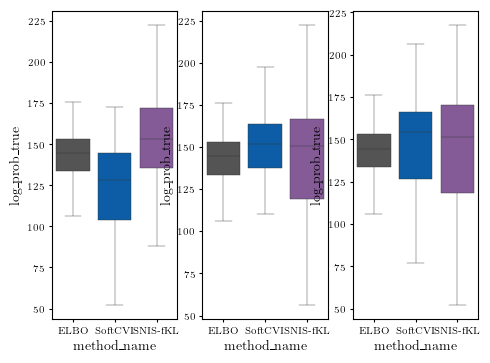

In [ ]:
df = pd.DataFrame(log_prob_true_data)

fig, axes = plt.subplots(ncols=3)

for ax, d in zip(axes, [1, 4, 8], strict=True):
    sns.boxplot(
        df[df["num_rounds"] == d],
        x="method_name",
        y="log_prob_true",
        **box_kwargs,
        ax=ax,
        hue="method_name",
    )
